https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 3_2 - Pragurile de Enable ale unui LDO

#### 3.1.1 Montajul experimental:
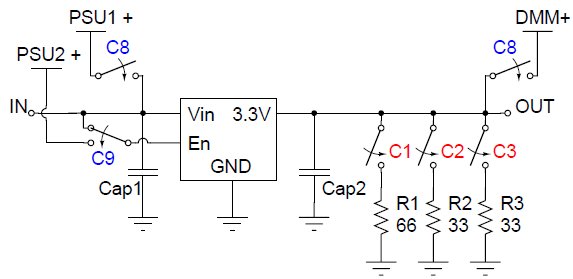

#### 3.1.2 Procedura de masurare:
In circuit este conectat un stabilizatorul linear de 3.3V, TLS850D0TE (datasheet). Sarcina de la iesirea circuitului si tensiunea de “Enable” pot fi configurate.
Prin actionearea lui C8 canalul 1 al sursei de tensiune este conectat la intrarea circuitului, iar multimetrul la iesirea acestuia.
C1 – Conecteaza la iesire un resistor de 66 ohmi (50mA)
C2 – Conecteaza la iesire un resistor de 66 ohmi (50mA) 
C3 – Conecteaza la iesire un resistor de 33 ohmi (100mA) 
C9 – Deconecteaza intrarea “Enable” de la Canalul 1 al sursei de alimentare (PSU1) si o conecteaza la canalul 2 (PSU2).

Multimetrul măsoară tensiunea de iesire a stabilizatorului LDO. Tensiunea de alimentare poate fi monitorizata cu sursa de alimentare. Se variaza tensiunea de alimentare si se masoara tensiunea de iesire.

#### 3.2 Codul sursa:
3.2.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [7]:
dmm_handle = connect!("ASRL1::INSTR")
psu_handle = connect!("ASRL4::INSTR")
#fgen = connect!("ASRL1::INSTR")
#scope = connect!("USB0::0x0699::0x0364::C057729::INSTR")
dmm = TIVM.GDM8246(dmm_handle);
psu = TIVM.PST3201(psu_handle);

In [2]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle);

3.2.2 Connfigurarea instrumentelor

In [8]:
# Sursa de tensiune
# C1
set_source_lev(psu, "C1", 8) # tensiunea de alimentare pentru LDO
set_volt_protection(psu, "C1", 25)
set_max_curr(psu, "C1", 0.5)
# C2
set_source_lev(psu, "C2", 0)
set_volt_protection(psu, "C2", 25)
set_max_curr(psu, "C2", 0.5)
# C3
set_source_lev(psu, "C3", 0)
set_volt_protection(psu, "C3", 25)
set_max_curr(psu, "C3", 0.5)
# Output on
set_outp(psu, "C1", "on") # PST3201 nu poate porni/opri canale individual

# Multimetrul GDM8246
set_sense_func(dmm, "C1", "DCV") # alte functii: ACV, AC+DCV, RIPPLE, OHM
#set_sense_range_auto(dmm, "C1", "on") # autorange
set_sense_range(dmm, "C1", 10) # 10V range

3.2.3 Definirea stimulilor si a variabilelor auxiliare

In [9]:
volt_step = 0.025
volt_range = 1:volt_step:2
Ve_meas = []
Vo_meas = []
VE_high = 0
VE_low = 0

0

3.2.4 Bucla de masurare

In [11]:
Ve_meas = []
Vo_meas = []
VE_high = 0
VE_low = 0
# 1. Pragul de sus. Tensiunea de Enable creste
for crt_volt in volt_range
    # setare tensiune psu
    set_source_lev(psu, "C2", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    crt_Vo_meas = get_primary_measurement(dmm, "C1")
    # adaugarea masuratorilor in vectorii de rezultate
    push!(Ve_meas, crt_volt)
    push!(Vo_meas, crt_Vo_meas)
    @info "Ve_meas=$crt_volt, Vo_meas=$crt_Vo_meas"
    
    # verificare prag
    if crt_Vo_meas < 2.5
        VE_high = crt_volt
    end
end

# 2. Pragul de jos. Tensiunea de Enable scade
for crt_volt in reverse(volt_range)
    # setare tensiune psu
    set_source_lev(psu, "C2", crt_volt)
    sleep(1) # sursa de tensiune si multimetrul raspund lent la comenzi
    # masurare tensiune cu dmm
    crt_Vo_meas = get_primary_measurement(dmm, "C1")
    # adaugarea masuratorilor in vectorii de rezultate
    push!(Ve_meas, crt_volt)
    push!(Vo_meas, crt_Vo_meas)
    @info "Ve_meas=$crt_volt, Vo_meas=$crt_Vo_meas"
    
    # verificare prag
    if crt_Vo_meas > 2.5
        VE_low = crt_volt
    end
end

VE_hyst = VE_high - VE_low
@info "Pragurile de Enable: VE_high=$VE_high, VE_low=$VE_low, VE_hyst=$VE_hyst"

┌ Info: Ve_meas=1.0, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.025, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.05, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.075, Vo_meas=0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.1, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.125, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.15, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.175, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.2, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.225, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.25, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.275, Vo_meas=0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.3, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.325, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.35, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.375, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.4, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.425, Vo_meas=-0.0
└ @ Main In[11]:15
┌ Info: Ve_meas=1.45, Vo_m

3.2.5 Oprirea instrumentelor

In [12]:
set_source_lev(psu, "C1", 0)
set_source_lev(psu, "C2", 0)
set_source_lev(psu, "C3", 0)
set_outp(psu, "C1", "off") # PST3201 nu poate porni/opri canale individual

3.2.6 Generarea caracteristicii Vo vs Ve a LDO-ului

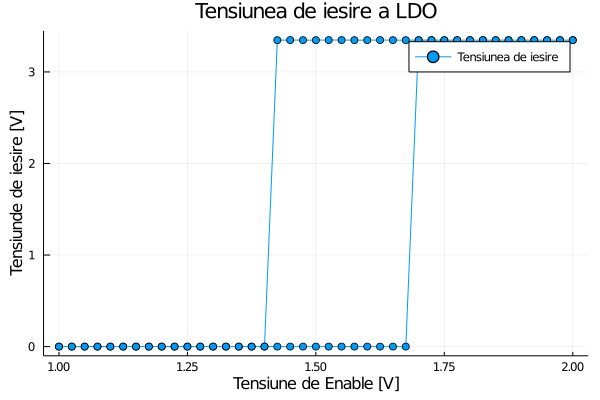

In [13]:
h=plot(Ve_meas, Vo_meas; markershape=:circle, label="Tensiunea de iesire");
title!("Tensiunea de iesire a LDO");
xlabel!("Tensiune de Enable [V]");
ylabel!("Tensiunde de iesire [V]");
display(h)

3.2.7 Salvarea datelor in fisierul .csv

In [14]:
df = DataFrame("Tensiune de Enable [V]" => Ve_meas, "Tensiunde de iesire [V]" => Vo_meas)
CSV.write("03_LDO_Vo_vs_Ve.csv", df)

"03_LDO_Vo_vs_Ve.csv"

3.2.8 Deconectarea instrumentelor

In [15]:
disconnect!(dmm_handle)
disconnect!(psu_handle)

0

#### 3.3 Desfasurarea lucrarii:

In [ ]:
1. Mariti precizia masuratorilor
2. Masurati caracteristica tensiunii de iesire fata de tensiunea de intrare pentru 2 curenti de sarcina diferiti. Introduceti datele in acelasi fisier CSV.
Indicatie: Se realizeaza o noua masuratoare; vectorii in care vor fi introduse datele au nume diferit; se introduce o noua coloana pentru curentul de sarcina

df = DataFrame("I" => "0", "Tensiune de alimentare [V]" => Vi_meas, "Tensiune de iesire [V]" => Vo_meas)
CSV.write("0003_LDO_Vo_vs_Vi_new.csv", df)

Df1 = DataFrame("I" => "50mA", "Tensiune de alimentare [V]" => Vi_meas1, "Tensiune de iesire [V]" => Vo_meas1)

CSV.write("0003_LDO_Vo_vs_Vi_new.csv", df1, append = true)

3. Masurati pragurile de „Enable” si histerezisul.
Indicatie: Se mentine tensiunea de intrare fixa (PSU CH1, de ex. 8V), si se aplica o rampa de tensiune pe pinul de enable intre 0-2V (PSU CH2). Pentru a determina cele doua praguri, rampa trebuie sa fie intai crescatoare si apoi descrescatoare. 
4. Repetati masuratoarea de la punctul 3 pentru cazul in care sarcina este diferita de 0. Ce observati?
5. Masurati rezistenta serie a elementului regulator.
Indicatie: Pentru a masura rezistenta serie, se iau o pereche curent/tensiune in „dropout”(atunci cand tensiunea de la iesirea regulatorului este mai mica decat cea nominala); se masoara tensiunea de la iesirea stabilizatorului si curentul pentru tensiunea de intrare de 3V sau 2.5V.